In [1]:
import models.utils
import random, gc, os, pickle, csv, time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update50_valid_class_diff_sr_ta3_YelpDataset.pickle"
pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update50_valid_class_diff_sr_ta3_YahooAnswersDataset.pickle"
pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update50_valid_class_diff_sr_ta3_DBPediaDataset.pickle"
pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update50_valid_class_diff_sr_ta3_AmazonDataset.pickle"
pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update50_valid_class_diff_sr_ta3_AGNewsDataset.pickle"


#pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update200_valid_class_diff_sr_ta4_YahooAnswersDataset.pickle"
#pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update200_valid_class_diff_sr_ta4_YelpDataset.pickle"
#pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update200_valid_class_diff_sr_ta4_DBPediaDataset.pickle"
#pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update200_valid_class_diff_sr_ta4_AmazonDataset.pickle"
pickle_path = "/data/model_runs/original_oml/aOML-order1-inlr010-2022-08-30-sr-query/OML-order1-id4-2022-08-30_05-21-18.854228_update200_valid_class_diff_sr_ta4_AGNewsDataset.pickle"

update = 200

In [3]:
with open(pickle_path, 'rb') as f:
    class_dict = pickle.load(f)

In [4]:
# This is number of adaptation steps
class_dict.keys()

dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])

In [5]:
# This is number of classes
class_dict[5].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

# Color Map

In [6]:
def getColorFromIndex(n):
    colorList = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', \
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    return colorList[n%len(colorList)]

0.0008429090088854233
-3.394506845830215e-05
0.0023114259315318323
-7.239822983845241e-05
-0.003946135490615335
-0.01436053925866468
-0.0007325561383428673
0.000425399690025693
0.0005197328067798582
-8.702328506236275e-05


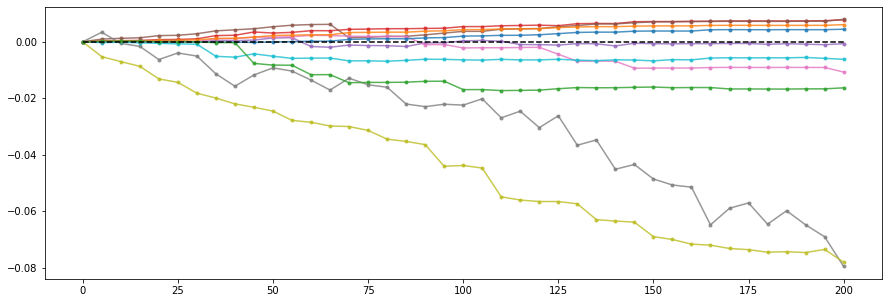

In [7]:
fig, ax =  plt.subplots(figsize=(15,5))

show_class = [23,33]

x = list(class_dict.keys())
for class_idx in range(*show_class):
    y = [np.mean(class_dict[adapt_idx][class_idx]) for adapt_idx in class_dict.keys()]
    print(y[4])
    ax.plot([0]+x, [0]+y, alpha=0.8, marker=".", c=getColorFromIndex(class_idx))
ax.plot([0,update],[0, 0], ls='--', c='k')  # Line 

# Avg All Classes

In [8]:
# Add all the classes of the class_dict
# map adapt -> number
all_class_dict = {}
for adapt_idx in class_dict.keys():
    all_class_dict[adapt_idx] = np.mean([class_dict[adapt_idx][class_idx] for class_idx in range(0,33)])

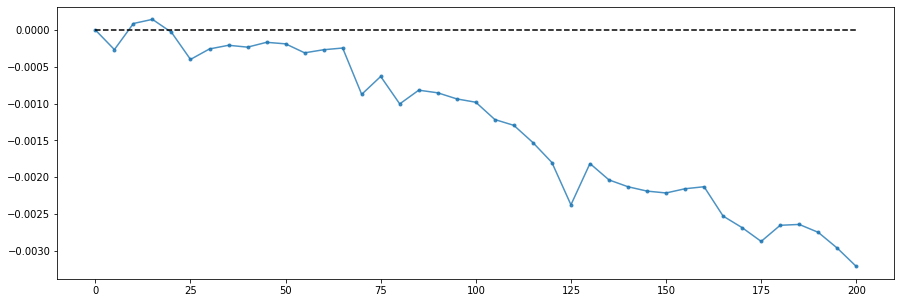

In [9]:
fig, ax =  plt.subplots(figsize=(15,5))

x = list(class_dict.keys())
y = [all_class_dict[adapt_idx] for adapt_idx in class_dict.keys()]

ax.plot([0]+x, [0]+y, alpha=0.8, marker=".", c=getColorFromIndex(0))
ax.plot([0,update],[0, 0], ls='--', c='k')  # Line 

# Avg Of each Task

In [10]:
task_dict = {
    0: list(range(5, 9)), # AG
    1: list(range(0, 5)), # Amazon
    2: list(range(0, 5)), # Yelp
    3: list(range(9, 23)), # DBPedia
    4: list(range(23, 33)), # Yahoo
}
task_map = {
    0: "AG",
    1: "Amazon",
    2: "Yelp",
    3: "DBPedia",
    4: "Yahoo"
}

In [11]:
# Map adapt_idx -> task -> score
all_task_dict = {}
for adapt_idx in class_dict.keys():
    all_task_dict[adapt_idx] = {}    
    for task_idx in task_dict.keys():
        all_task_dict[adapt_idx][task_idx] = np.mean([class_dict[adapt_idx][class_idx] for class_idx in task_dict[task_idx]])

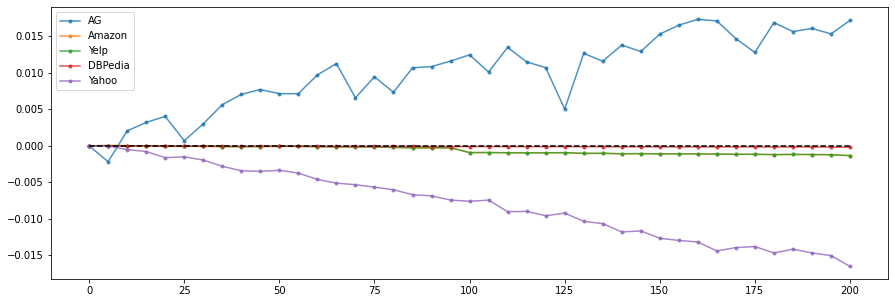

In [12]:
fig, ax =  plt.subplots(figsize=(15,5))

#show_task = 0

x = list(class_dict.keys())
for task_idx in task_dict.keys():
    y = [all_task_dict[adapt_idx][task_idx] for adapt_idx in class_dict.keys()]
    
    ax.plot([0]+x, [0]+y, alpha=0.8, marker=".", c=getColorFromIndex(task_idx), label=task_map[task_idx])
ax.plot([0,update],[0, 0], ls='--', c='k')  # Line 
ax.legend()